<a href="https://colab.research.google.com/github/jonnes-nascimento/iniciacao_cientifica/blob/master/IC_USJT_2020_COVID_19_Dados_Gerais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento básico dos dados

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uri = "https://gist.githubusercontent.com/jonnes-nascimento/2c1cf5448199656ba0918e28167aad9c/raw/200927a50d9e8150488c51574b4cc5907fd02848/brazil_covid19_macro.csv"

# lê os dados do dataset no Gist
dados = pd.read_csv(uri)

# apaga a coluna country pois os dados já trazem somente informações do Brasil
dados = dados.drop(columns = ['country'], axis=1)

# definição dos novos nomes das colunas
a_renomear = {
    "date" : "Data",
    "week" : "Semana",
    "cases" : "Casos",
    "deaths" : "Mortes",
    "recovered" : "Recuperados",
    "monitoring" : "Monitorados"
}

# renomeia as colunas
dados = dados.rename(columns = a_renomear)

# converte a coluna de data
dados['Data'] = pd.to_datetime(dados['Data'], format='%Y-%m-%d')

# extrai o mes e ano da data em novas colunas
dados['Mes'] = pd.DatetimeIndex(dados['Data']).month

a_substituir = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

dados['Mes_Desc'] = dados['Mes'].map(a_substituir)

# gera um dataframe com os dados e preenche os espaços em branco, nas colunas de valores, com zero
df = pd.DataFrame(dados).fillna(0)

# exibe os últimos 5 registros do dataset
df.head()

,Data,Semana,Casos,Mortes,Recuperados,Monitorados,Mes,Mes_Desc
0,2020-02-25,9,0,0,0.0,0.0,2,Fevereiro
1,2020-02-26,9,1,0,0.0,0.0,2,Fevereiro
2,2020-02-27,9,1,0,0.0,0.0,2,Fevereiro
3,2020-02-28,9,1,0,0.0,0.0,2,Fevereiro
4,2020-02-29,9,2,0,0.0,0.0,2,Fevereiro


In [117]:
df.tail()

,Data,Semana,Casos,Mortes,Recuperados,Monitorados,Mes,Mes_Desc
126,2020-06-30,27,1402041,59594,790040.0,552407.0,6,Junho
127,2020-07-01,27,1448753,60632,826866.0,561255.0,7,Julho
128,2020-07-02,27,1496858,61884,852816.0,582158.0,7,Julho
129,2020-07-03,27,1539081,63174,868372.0,607535.0,7,Julho
130,2020-07-04,27,1577004,64265,876359.0,636380.0,7,Julho


#Análise dos dados

Text(0, 0.5, 'Quantidade (em milhões)')

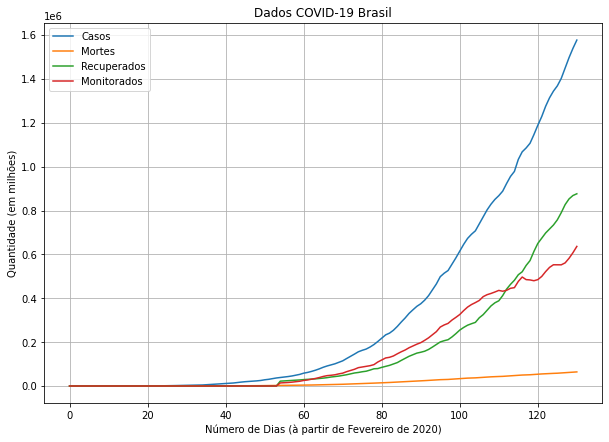

In [41]:
ax = df[['Casos', 'Mortes', 'Recuperados', 'Monitorados']].plot(
    figsize=(10,7),
    kind='line',
    title='Dados COVID-19 Brasil',
    grid=True)
ax.set_xlabel("Número de Dias (à partir de Fevereiro de 2020)")
ax.set_ylabel("Quantidade (em milhões)")

In [42]:
df.head()

,Data,Semana,Casos,Mortes,Recuperados,Monitorados,Mes,Mes_Desc
0,2020-02-25,9,0,0,0.0,0.0,2,Fevereiro
1,2020-02-26,9,1,0,0.0,0.0,2,Fevereiro
2,2020-02-27,9,1,0,0.0,0.0,2,Fevereiro
3,2020-02-28,9,1,0,0.0,0.0,2,Fevereiro
4,2020-02-29,9,2,0,0.0,0.0,2,Fevereiro


In [43]:
df.shape

(131, 8)

(131, 1)
(131, 1)


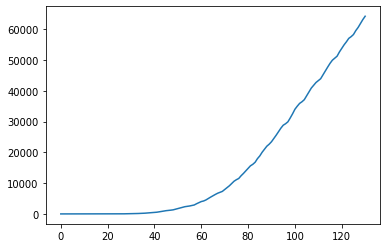

In [115]:
# como estamos lidando com uma base de dados unica, devemos separar os dados que serao usados como features e os dados usados resultados
# primeiramente, vamos analisar uma previsão do número de mortes, portanto:

x = df[['Data']]

x = np.arange(len(df['Data'])).reshape(-1,1)

y = df['Mortes']

y = np.array(y).reshape(-1,1)

print(x.shape)
print(y.shape)

plt.plot(x, y)

In [120]:
# criaremos, agora, uma variavel para guardar as previsoes à serem feitas com base nos dados que já temos.
# essa previsão será feita para DIAS posteriores à última data de nosso dataframe.

DIAS = 60 # neste caso, as previsões irão até 04/09/2020

previsoes = np.arange(len(df['Data']) + DIAS).reshape(-1,1)

previsoes.shape

(191, 1)

In [121]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.15, shuffle=False) # shuffle = false pois estamos trabalhando com uma série temporal e não queremos que o algoritmo busque valores aleatórios (tem que fazer a busca na ordem)

teste_x

array([[111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130]])

In [122]:
teste_y

array([[43959],
       [45241],
       [46510],
       [47748],
       [48954],
       [49976],
       [50617],
       [51271],
       [52645],
       [53830],
       [54971],
       [55961],
       [57070],
       [57622],
       [58314],
       [59594],
       [60632],
       [61884],
       [63174],
       [64265]])

In [123]:
print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 111 elementos e testaremos 20 elementos


#Regressão polinomial

In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4) # testar com outras potências

# temos que refazer nossas bases de treinamento e testes pois, como estão agora, elas só têm informações lineares (por exemplo, x.shape = (131, 1))
treino_x_poly = poly.fit_transform(treino_x) # atenção: fazer o fit_transform somente uma vez na base!
teste_x_poly = poly.transform(teste_x)

In [125]:
teste_x_poly.shape

(20, 5)

In [126]:
treino_x_poly.shape # adiciona uma coluna a mais

(111, 5)

In [127]:
treino_x_poly # (valor fixo 1, valor original, valor original elevado ao quadrado, valor original elevado a terceira, etc)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03],
       [1.00000000e+00, 9.00000000e+00, 8.10000000e+01, 7.29000000e+02,
        6.56100000e+03],
       [1.00000000e+00, 1.0000

# Treinamento

In [128]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# como queremos que as previsões sejam feitas com base nos dados originais, utilizamos os valores de x ajustados para a curva polinomial
# e os valores de y são os originais
regressor.fit(treino_x_poly, treino_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Previsões

In [129]:
# fazemos as previsoes com base nos dados polinomiais de teste
poly_test_pred = regressor.predict(teste_x_poly)

# visualizando os dados de previsão para comparar com os dados reais
poly_test_pred

array([[45649.80771483],
       [46840.5535225 ],
       [48038.60913572],
       [49243.3608682 ],
       [50454.17954041],
       [51670.42047957],
       [52891.42351969],
       [54116.51300155],
       [55344.99777266],
       [56576.17118733],
       [57809.31110663],
       [59043.67989838],
       [60278.52443718],
       [61513.0761044 ],
       [62746.55078816],
       [63978.14888334],
       [65207.05529163],
       [66432.43942143],
       [67653.45518793],
       [68869.24101311]])

In [130]:
# dados reais
teste_y

array([[43959],
       [45241],
       [46510],
       [47748],
       [48954],
       [49976],
       [50617],
       [51271],
       [52645],
       [53830],
       [54971],
       [55961],
       [57070],
       [57622],
       [58314],
       [59594],
       [60632],
       [61884],
       [63174],
       [64265]])

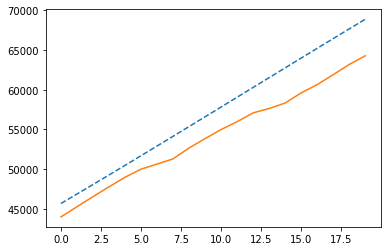

In [131]:
# acima, verificamos que o algoritmo previu, com certa acurácia, os valores
# geramos um gráfico para visualizar esses dados
plt.plot(poly_test_pred, linestyle='dashed')
plt.plot(teste_y)

# Métricas

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# quanto menores os valores, mais próximo dos valores reais estaremos

print("Mean absolut error: ", mean_absolute_error(poly_test_pred, teste_y))
print("Mean squared error: ", mean_squared_error(poly_test_pred, teste_y))
print("Root mean squared error: ", np.sqrt(mean_squared_error(poly_test_pred, teste_y)))

Mean absolut error:  3005.9759437325542
Mean squared error:  10397971.204531305
Root mean squared error:  3224.5885325931595


# Previsões

In [133]:
# faremos as previsoes para prevermos a quantidade para DIAS
previsoes.shape

(191, 1)

In [134]:
treino_x_all = poly.transform(previsoes)
treino_x_all.shape

(191, 5)

In [135]:
poly_pred_all = regressor.predict(treino_x_all)
len(poly_pred_all)

191

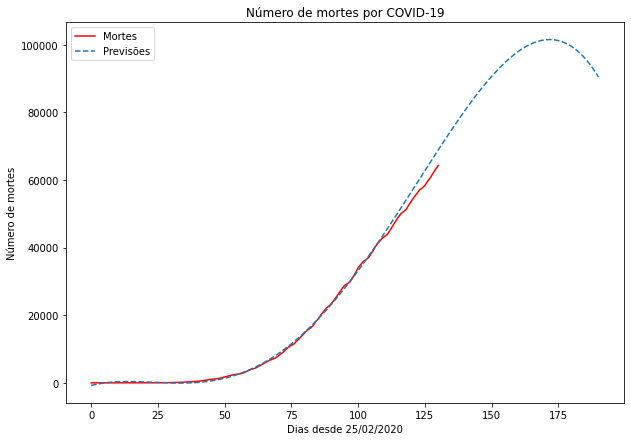

In [139]:
# plot do gráfico real, sem a quantidade de dias para previsão
plt.figure(figsize=(10,7)) 
plt.plot(previsoes[:-DIAS], y, color='red')
plt.plot(previsoes, poly_pred_all, linestyle='dashed')
plt.title('Número de mortes por COVID-19')
plt.xlabel('Dias desde 25/02/2020')
plt.ylabel('Número de mortes')
plt.legend(['Mortes', 'Previsões']);